# 1️⃣ Multi-Layer Perceptron (MLP) Notes

## A. What is a Multi-Layer Perceptron (MLP)? 🤔
- An **MLP** is a type of **feedforward artificial neural network**.  
- Structure:
  - 🟢 **Input layer** → receives input features.
  - 🔵 **Hidden layers** → one or more layers between input and output.
  - 🔴 **Output layer** → produces predictions.  
- Each neuron in one layer connects to **all neurons** in the next layer (fully connected).
  
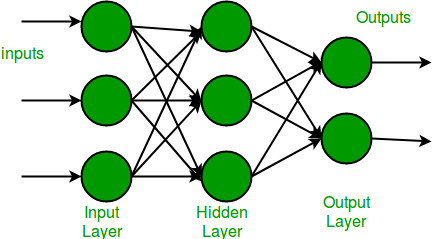

## B. Role of Hidden Layers 🏗️
- A **single-layer perceptron** can only solve **linearly separable problems** (e.g., AND, OR).  
- Many real-world problems are **non-linear** (e.g., XOR, image recognition).  
- **Hidden layers**:
  - Allow the network to **learn non-linear decision boundaries**.  
  - Act as **feature extractors**:
    🔹 First hidden layer → captures **simple features**.
    🔹 Deeper hidden layers → capture **complex, high-level features**.

## C. Why Multiple Hidden Layers Help Solve Non-Linear Problems ⚡

- ✅ **One hidden layer** can approximate any function (Universal Approximation Theorem)  
  but may require too many neurons.  
- ✅ **Multiple hidden layers**:
  - Break complex problems into smaller transformations.  
  - Capture **hierarchical structures** (low → mid → high-level features).  
  - Improve **learning efficiency** and **generalization**.


## D. Working of an MLP 🔄
1. **Forward Propagation**  
   - Input → Linear transformation (weights + bias) → Non-linear activation → Next layer.  
   - Each hidden layer transforms data into a new feature space.  

2. **Activation Functions** ⚙️  
   - Introduce **non-linearity**.  
   - Common functions: **Sigmoid, ReLU, Tanh**.  

3. **Backpropagation** 🔙  
   - Compute error using a **loss function**.  
   - Propagate error backwards to update weights (gradient descent).  


## E. Applications of MLP 🌍
- 🖼️ Image classification  
- 📝 Natural language processing  
- 📊 Regression problems  
- 🎤 Speech recognition  
- 🏥 Medical diagnosis  


## F. Summary (Key Points) ✨
- **MLP = Input → Hidden Layers → Output**.  
- **Hidden layers** are essential to solve **non-linear problems**.  
- Without hidden layers → only linear separation is possible.  
- Multiple hidden layers + non-linear activation functions →  
  enable learning of **complex, hierarchical, non-linear patterns**.  
- Foundation of **deep learning** 🚀.

# 🧠 Multi-Layer Perceptron (MLP) on MNIST: With vs Without Activation Functions

In this notebook, we build a **2–3 layer MLP** in both **PyTorch** and **TensorFlow**,  
train on the **MNIST dataset**, and compare the effect of **activation functions** on accuracy.

# 📝 Library Explanations

- **`import tensorflow as tf`**  
  Imports the TensorFlow library, which is used for building and training neural networks.  
  The alias `tf` is used to simplify code references.

- **`from tensorflow.keras import Sequential`**  
  Imports the Sequential model API from Keras (built into TensorFlow).  
  Sequential allows stacking layers one after another for a simple feedforward network.

- **`from tensorflow.keras.layers import Dense, Flatten`**  
  - Dense: Fully connected layer used in MLPs.  
  - Flatten: Converts 2D image input (28×28 pixels) into a 1D vector for the dense layers.

- **`from tensorflow.keras.datasets import mnist`**  
  Imports the MNIST dataset (handwritten digits 0–9).  
  Provides easy access to train and test sets.

- **`import matplotlib.pyplot as plt`**  
  Imports Matplotlib for visualizing training results, such as accuracy and loss curves.

In [23]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 📝 Step 2: Load and Preprocess MNIST Dataset

- **`(x_train, y_train), (x_test, y_test) = mnist.load_data()`**  
  Loads the MNIST dataset from Keras.  
  - `x_train` and `x_test`: input images (28×28 pixels) for training and testing.  
  - `y_train` and `y_test`: corresponding labels (digits 0–9) for each image.

- **`x_train, x_test = x_train / 255.0, x_test / 255.0`**  
  Normalizes the pixel values from the original range `[0, 255]` to `[0, 1]`.  
  Normalization helps neural networks train faster and improves convergence.

- **`print("Training samples:", x_train.shape[0])`**  
  Displays the total number of training samples.

- **`print("Test samples:", x_test.shape[0])`**  
  Displays the total number of testing samples.

✅ After this step, the dataset is loaded, normalized, and ready for feeding into the MLP model.

In [24]:
# Step 2: Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])

Training samples: 60000
Test samples: 10000


# 📝 Step 3a: Define MLP Model Without Activation Functions

- **`from tensorflow.keras import Input, Sequential`**  
  Imports the `Input` layer and `Sequential` API from Keras.  
  - `Input`: explicitly defines the input shape for the model.  
  - `Sequential`: allows stacking layers one after another in order.

- **`from tensorflow.keras.layers import Dense, Flatten`**  
  - `Dense`: fully connected layer used in MLPs.  
  - `Flatten`: converts 2D images (28×28 pixels) into a 1D vector for the dense layers.

- **`model_no_activation = Sequential([...])`**  
  Defines a simple **2-hidden layer MLP** with no activation functions:  
  1. `Input(shape=(28,28))`: specifies the input image size.  
  2. `Flatten()`: flattens the 28×28 image into a 784-length vector.  
  3. `Dense(256, activation=None)`: first hidden layer with 256 neurons and **linear output**.  
  4. `Dense(128, activation=None)`: second hidden layer with 128 neurons and **linear output**.  
  5. `Dense(10, activation='softmax')`: output layer for 10 classes (digits 0–9), using **softmax** to output probabilities.

- **`model_no_activation.compile(...)`**  
  Compiles the model with:  
  - `optimizer='adam'`: Adam optimizer for training.  
  - `loss='sparse_categorical_crossentropy'`: loss function for multi-class classification.  
  - `metrics=['accuracy']`: track accuracy during training.

✅ This model behaves like a **linear MLP**, since the hidden layers have no activation functions.  
It is used to compare performance against a model **with ReLU or other non-linear activations**.

In [38]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define model without activation
model_no_activation = Sequential([
    Input(shape=(28, 28)),          # Correct way to specify input
    Flatten(),                       # Flatten the image
    Dense(256, activation=None),     # Hidden layer 1 (linear)
    Dense(128, activation=None),     # Hidden layer 2 (linear)
    Dense(10, activation='softmax')  # Output layer
])

# Compile model
model_no_activation.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 📝 Step 3b: Define MLP Model WITH ReLU Activation

- **`model_with_activation = Sequential([...])`**  
  Defines a **2-hidden layer MLP** with **ReLU activation functions**:  

  1. `Flatten(input_shape=(28, 28))`  
     - Flattens the 28×28 image into a 784-length vector.  
     - Input shape is specified here since it’s the first layer.

  2. `Dense(256, activation='relu')`  
     - First hidden layer with 256 neurons.  
     - **ReLU activation** introduces non-linearity, allowing the network to learn complex patterns.

  3. `Dense(128, activation='relu')`  
     - Second hidden layer with 128 neurons.  
     - Again, ReLU introduces non-linear transformations.

  4. `Dense(10, activation='softmax')`  
     - Output layer with 10 neurons (digits 0–9).  
     - **Softmax activation** outputs probabilities for each class.

- **`model_with_activation.compile(...)`**  
  Compiles the model with:  
  - `optimizer='adam'`: Adam optimizer for efficient training.  
  - `loss='sparse_categorical_crossentropy'`: suitable for multi-class classification.  
  - `metrics=['accuracy']`: tracks accuracy during training.

✅ Using **ReLU activations** in hidden layers allows the model to capture **non-linear patterns**, improving accuracy compared to a linear MLP.

In [37]:
model_with_activation = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),  # Hidden layer 1 with ReLU
    Dense(128, activation='relu'),  # Hidden layer 2 with ReLU
    Dense(10, activation='softmax') # Output layer
])

# Compile model
model_with_activation.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 📝 Step 4a: Train Model WITHOUT Activation Functions

- **`history_no_act = model_no_activation.fit(...)`**  
  Trains the linear MLP model (without activation functions) on the MNIST dataset.

- **Parameters Explained:**  
  - `x_train, y_train`: training images and their corresponding labels.  
  - `epochs=5`: the model will iterate over the entire training dataset 5 times.  
  - `validation_data=(x_test, y_test)`: uses the test dataset to evaluate performance after each epoch.  
  - `verbose=2`: prints a summary of training progress for each epoch.

- **`history_no_act`**  
  - Stores training history including **loss** and **accuracy** for both training and validation sets.  
  - This allows us to **visualize performance** later.

✅ This step trains the linear MLP, which will later be compared to the model **with ReLU activation** to observe differences in accuracy.

In [32]:
# Step 4a: Train model without activation
history_no_act = model_no_activation.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=2
)

Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.8902 - loss: 0.3824 - val_accuracy: 0.9131 - val_loss: 0.3063
Epoch 2/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9078 - loss: 0.3277 - val_accuracy: 0.9051 - val_loss: 0.3303
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9120 - loss: 0.3114 - val_accuracy: 0.9159 - val_loss: 0.3038
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9148 - loss: 0.3018 - val_accuracy: 0.9164 - val_loss: 0.3039
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9165 - loss: 0.2965 - val_accuracy: 0.9041 - val_loss: 0.3327


In [36]:
# Step 4b: Train model with ReLU activation
history_with_act = model_with_activation.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=2
)

Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9908 - loss: 0.0268 - val_accuracy: 0.9767 - val_loss: 0.0893
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9920 - loss: 0.0233 - val_accuracy: 0.9785 - val_loss: 0.0806
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9757 - val_loss: 0.1016
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9782 - val_loss: 0.1010
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9951 - loss: 0.0139 - val_accuracy: 0.9801 - val_loss: 0.0963


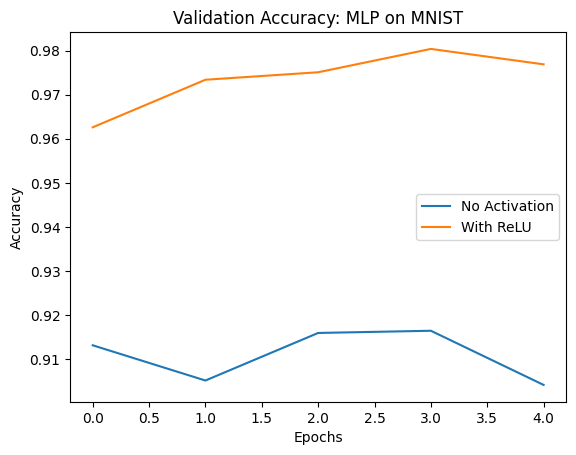

In [35]:
# Step 5: Compare validation accuracy
plt.plot(history_no_act.history['val_accuracy'], label='No Activation')
plt.plot(history_with_act.history['val_accuracy'], label='With ReLU')
plt.title("Validation Accuracy: MLP on MNIST")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 2️⃣ Forward Pass

##  Forward Pass Overview  
-  **Definition**: The forward pass (or forward propagation) is the process where **input data flows through the network** to produce an output or prediction. 
-  At each layer, operations include:
  - **Linear transformation**: \( z = W \cdot x + b \) (weights + bias){index=1}  
  - **Non-linear activation**: Applies a function like ReLU, sigmoid, or tanh to introduce non-linearity 
-  This sequence — input → linear transform → non-linearity — repeats until reaching the final output layer.


##  Step-by-Step: Forward Pass Process  
1. **Input Layer**  
   - Receives raw features (often normalized or standardized)
     
     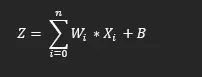
     
2. **Hidden Layers**  
     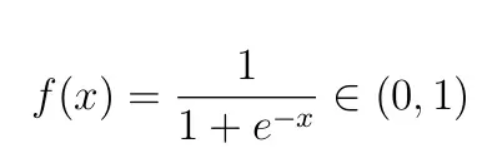
3. **Output Layer**  
   - Applies a final transformation and activation depending on the task:
     - **Sigmoid** for binary classification  
     - **Softmax** for multi-class classification  
     - **Linear** for regression

 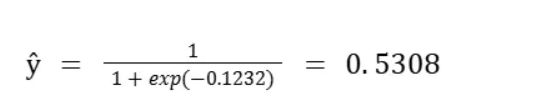

4. **Prediction**  
   - The output is compared to the true target using a **loss function**, setting up the stage for **backpropagation** 


##  Why Activation (Non-Linearity) Matters  
- Activation functions introduce **non-linearity** — without it, a neural network (no matter how deep) collapses into a single linear transformation.
- This non-linearity enables the model to learn and represent **complex, non-linear relationships**.


##  Quick Summary 
- **Input → Linear transform (weights + bias) → Activation → Repeat per layer → Output**  
- **Essential ingredients**:  
  - Linear operations for transforming data  
  - Non-linear activations for learning complex patterns  
  - Repeated across hidden layers until an interpretable output is generated  


In [10]:
import numpy as np

# -----------------------
# Helper functions
# -----------------------

# ReLU activation
def relu(z):
    return np.maximum(0, z)

# Softmax activation
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # stability trick
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# -----------------------
# Forward Pass Implementation
# -----------------------

# Input data (3 features, 1 sample)
x = np.array([[1.0],
              [2.0],
              [3.0]])   # shape (3,1)

# Initialize weights and biases
np.random.seed(42)  # reproducibility
W1 = np.random.randn(4, 3)   # 4 neurons in hidden layer 1, 3 inputs
b1 = np.random.randn(4, 1)

W2 = np.random.randn(4, 4)   # 4 neurons in hidden layer 2, 4 inputs
b2 = np.random.randn(4, 1)

W3 = np.random.randn(3, 4)   
b3 = np.random.randn(3, 1)

# -----------------------
# Forward propagation steps
# -----------------------

# Layer 1
z1 = np.dot(W1, x) + b1
a1 = relu(z1)

# Layer 2
z2 = np.dot(W2, a1) + b2
a2 = relu(z2)

# Output layer
z3 = np.dot(W3, a2) + b3
a3 = softmax(z3)   # final prediction

# -----------------------
# Results
# -----------------------
print("Input x:\n", x)
print("\nLayer 1 activations (a1):\n", a1)
print("\nLayer 2 activations (a2):\n", a2)
print("\nOutput probabilities (a3):\n", a3)
print("\nPredicted class:", np.argmax(a3))

Input x:
 [[1.]
 [2.]
 [3.]]

Layer 1 activations (a1):
 [[2.40521344]
 [0.        ]
 [0.        ]
 [0.        ]]

Layer 2 activations (a2):
 [[0.        ]
 [2.46748718]
 [0.        ]
 [0.        ]]

Output probabilities (a3):
 [[0.02208772]
 [0.51629235]
 [0.46161993]]

Predicted class: 1


# 3️⃣ Loss functions

## 🔹 Forward and Backward Propagation

- **Forward Propagation:**  
  Computes the predicted output for a given input vector `x`.  
  - Input `x` → weights `W1` → dot-product → activation → next layer → output `y`.

- **Backpropagation + Gradient Descent:**  
  Improves weights and biases to reduce error by minimizing the loss function.

- **Prediction Vector:**  
  - Denoted as `y`, it represents the neural network’s output.  
  - **Regression:** continuous numbers (e.g., stock price).  
  - **Classification:** probability scores between 0 and 1.

- **Ground Truth Label:**  
  Denoted as `y_hat`, it represents the actual value we want the network to predict.

---

## 🔹 What is a Loss Function?

- A **loss function** measures how well the neural network performs a task.  
- It quantifies the difference between the predicted vector `y` and the ground truth `y_hat`.  
- Minimizing the loss function improves predictions via backpropagation.

- **Key Points:**  
  - **Classification:** Use **cross-entropy loss** to predict probabilities.  
  - **Regression:** Use **mean squared error (MSE)** to predict continuous values.  
  - **Demand Forecasting:** Use **mean absolute percentage error (MAPE)** to track performance.


# 🧠 Cross-Entropy Loss in Machine Learning

## 📘 What is Cross-Entropy Loss?

Cross-Entropy Loss (also called **Log Loss**) is used in **classification problems** to measure how close the predicted probabilities are to the true labels.  
It compares the predicted probability distribution with the true distribution of classes.


## 🔍 Why Use Cross-Entropy Loss?

- ⚡ **Penalizes wrong predictions**: High confidence wrong predictions get higher loss.
- 📈 **Helps probability-based models**: Works well with softmax/logistic outputs.
- 🔬 **Mathematically sound**: Based on information theory.


## 🔄 Types of Cross-Entropy Loss

### 1️⃣ Binary Cross-Entropy
Used for **two-class problems** (0 or 1).

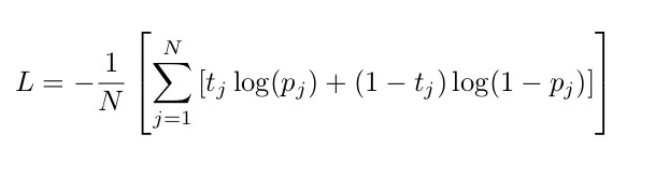

Where:
- `y` = true label (0 or 1)  
- `p` = predicted probability of positive class  


### 2️⃣ Categorical Cross-Entropy
Used for **multi-class problems**.

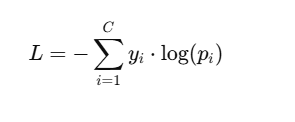
Where:
- `y_i` = true label (one-hot encoded)  
- `p_i` = predicted probability for class i  
- `C` = number of classes  


### 3️⃣ Sparse Categorical Cross-Entropy
Same as categorical cross-entropy but **labels are integers**, not one-hot encoded.

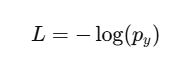

Where:
- `y` = integer representing true class  
- `p_y` = predicted probability for the true class  


## 🛠️ Applications

- 🖼️ **Image Classification** (e.g., cat vs dog)  
- 📄 **Text Classification** (e.g., spam vs not spam)  
- 🎤 **Speech Recognition** (e.g., transcribing audio)  
- 🏥 **Medical Diagnosis** (classifying medical images)


## ✅ Best Practices

- Use **Binary Cross-Entropy** for 2-class problems.  
- Use **Categorical Cross-Entropy** for multi-class problems with one-hot labels.  
- Use **Sparse Categorical Cross-Entropy** for multi-class problems with integer labels.  
- Always monitor the loss to check if the model is learning properly.


## 🔬 Summary

Cross-Entropy Loss is crucial for training neural networks in classification tasks. It ensures the predicted probabilities get closer to the true labels and provides strong feedback for **backpropagation**.


In [41]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 2: Load and preprocess MNIST dataset (multi-class classification)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels for categorical cross-entropy
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Step 3: Define MLP model
model = Sequential([
    Flatten(input_shape=(28,28)),   # Flatten image to vector
    Dense(128, activation='relu'),  # Hidden layer 1
    Dense(64, activation='relu'),   # Hidden layer 2
    Dense(10, activation='softmax') # Output layer (10 classes)
])

# Step 4: Compile model with categorical cross-entropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Cross-entropy loss
    metrics=['accuracy']
)

# Step 5: Train the model
history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test_cat),
    verbose=2
)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9295 - loss: 0.2404 - val_accuracy: 0.9621 - val_loss: 0.1289
Epoch 2/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9686 - loss: 0.1029 - val_accuracy: 0.9700 - val_loss: 0.0974
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9768 - loss: 0.0720 - val_accuracy: 0.9705 - val_loss: 0.0980
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9820 - loss: 0.0562 - val_accuracy: 0.9764 - val_loss: 0.0852
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9856 - loss: 0.0444 - val_accuracy: 0.9764 - val_loss: 0.0788
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0788     
Test Loss: 0.0788
Test Accuracy: 0.9764


# 🟢 Mean Squared Error (MSE) Loss Function

The **Mean Squared Error (MSE)** is a popular loss function used in **regression tasks**. It measures the average squared differences between **predicted** and **actual** values.


### 🔹 Formula

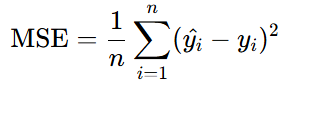

Where:  
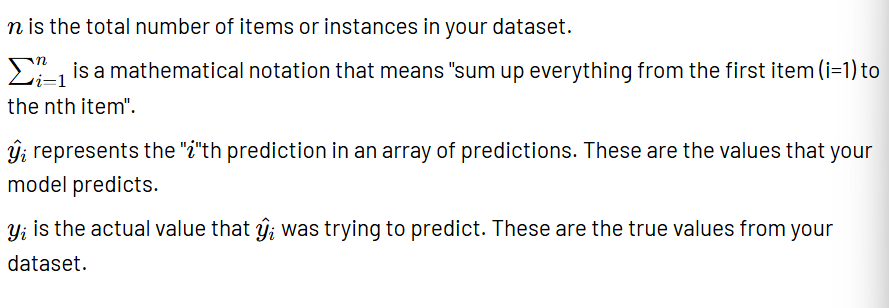

**Explanation:**  
- Calculates the difference between prediction and true value.  
- Squares the difference to remove negative signs and penalize larger errors.  
- Takes the average across all samples.

In [42]:
import numpy as np

# Example: actual values
y_true = np.array([1.0, 2.0, 3.0, 4.0])

# Example: predicted values
y_pred = np.array([0.9, 2.1, 2.8, 4.2])

# Calculate MSE
mse = np.mean((y_true - y_pred)**2)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.025000000000000036


### 🔹 Explanation of Mean Squared Error (MSE)

- `y_true - y_pred` → Calculates the **difference** between actual and predicted values (error).  

- `(y_true - y_pred)**2` → Squares the error to **remove negatives** and **penalize larger errors**.  

- `np.mean(...)` → Averages all squared errors to get the **Mean Squared Error (MSE)**.  

✅ **Interpretation:**  
The lower the MSE, the better the model predictions.

# 4️⃣ Optimizers

# 🔹 Stochastic Gradient Descent (SGD)

### What is SGD?
Stochastic Gradient Descent (SGD) is an **optimization algorithm** used in machine learning to minimize a loss function by iteratively adjusting the model's parameters. Unlike traditional gradient descent, which uses the **entire dataset**, SGD updates the parameters using a **single randomly chosen data point** or a **small subset (mini-batch)** at each iteration.  
This makes it **computationally efficient** and suitable for **large datasets**.


### 🧠 How SGD Works
1. **Initialization**: Start with initial values for the model parameters (e.g., weights and biases).  
2. **Random Sampling**: Select a random data point (or a small batch) from the training dataset.  
3. **Compute Gradient**: Calculate the gradient of the loss function w.r.t the parameters for the selected data point.  
4. **Update Parameters**: Adjust the parameters in the direction that reduces the loss using the computed gradient.  
5. **Repeat**: Continue for a set number of iterations or until convergence.

**Update rule:**

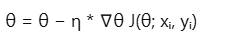

Where:  
- theta = model parameters  
- η = learning rate  
- ∇θ J(θ; xᵢ, yᵢ)= gradient of the loss for the i-th example


### ⚖️ Advantages of SGD
- Faster convergence for **large datasets**  
- **Lower memory usage** (processes one example at a time)  
- Suitable for **online learning** (streaming data)

### ⚠️ Disadvantages of SGD
- **Noisy updates** → erratic convergence path  
- May **overshoot minima** with a high learning rate  
- Requires careful **learning rate tuning**


### 🔄 Variants of SGD
- **Mini-Batch Gradient Descent**: Uses a small batch instead of a single example → balances efficiency and stability.  
- **Momentum-Based SGD**: Uses past gradients to smooth updates → accelerates convergence.  
- **Nesterov Accelerated Gradient (NAG)**: Computes gradients at **anticipated future position** → more responsive updates.


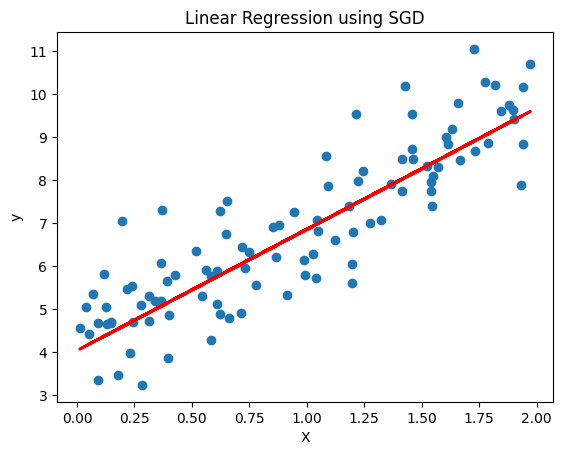

Estimated coefficients: [[4.03696007]
 [2.81555677]]


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = len(X)

# Initialize parameters
theta = np.random.randn(2, 1)

# Add x0 = 1 to each instance
X_b = np.c_[np.ones((m, 1)), X]

# SGD loop
for iteration in range(n_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

# Plotting
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red', linewidth=2)
plt.title("Linear Regression using SGD")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

print(f"Estimated coefficients: {theta}")

# 🔹 Momentum-Based Gradient Optimizers

Momentum-based gradient optimizers are used to optimize the training of machine learning models. They are more advanced than the classic gradient descent method and help accelerate the training process, especially for **large-scale datasets** and **deep neural networks**.

By incorporating a **"momentum" term**, these optimizers can navigate the loss surface more efficiently, leading to **faster convergence**, **reduced oscillations**, and better overall performance.


## Understanding Gradient Descent

Before understanding momentum-based optimizers, it’s important to understand **traditional gradient descent**.  

In gradient descent, the model's weights are updated by taking small steps in the direction of the **negative gradient** of the loss function.  

**Update rule (Gradient Descent):**
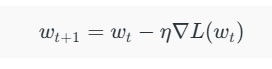

Where:
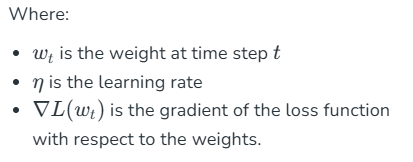

**Limitations:**  
- Slow convergence  
- Can get stuck in local minima, especially in **high-dimensional spaces**

## What is Momentum?

Momentum is a concept from physics where an object’s motion depends not only on the current force but also on its **previous velocity**.  

In gradient optimization, momentum **smoothens the optimization trajectory** by adding a term that helps the optimizer remember past gradients.


## Hyperparameters

- **Learning Rate (η):** Determines the size of the step taken during each update.  
- **Momentum Factor (β):** Controls how much of the past gradients are remembered.  
  - Close to 1 → more inertia  
  - Close to 0 → less reliance on past gradients  


## Working of the Algorithm

1. **Velocity Update:**  
   Velocity `v(t)` is updated considering both the previous velocity and the current gradient.  
   The momentum factor `β` controls the contribution of past velocity.  

2. **Weight Update:**  
   Weights are updated using the velocity `v(t+1)` → a weighted average of past gradients and current gradient.  



## Types of Momentum-Based Optimizers

### 1. Nesterov Accelerated Gradient (NAG)

NAG is an advanced form of momentum. It calculates the gradient at the **anticipated future position** rather than the current weights:

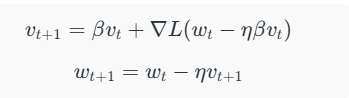



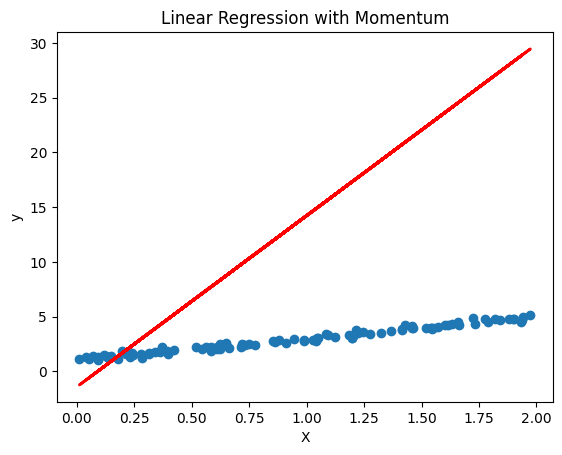

Estimated weights:
[[-1.42467788]
 [15.64715043]]


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data: y = 2*x + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.2

# Hyperparameters
learning_rate = 0.1
momentum = 0.9
n_iterations = 100
m = len(X)

# Initialize weights and velocity
w = np.random.randn(2, 1)
v = np.zeros((2, 1))

# Add x0 = 1 to each instance
X_b = np.c_[np.ones((m, 1)), X]

# Momentum-based Gradient Descent
for iteration in range(n_iterations):
    for i in range(m):
        xi = X_b[i:i+1]
        yi = y[i:i+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        v = momentum * v + learning_rate * gradient
        w = w - v

# Plot results
plt.scatter(X, y)
plt.plot(X, X_b.dot(w), color='red', linewidth=2)
plt.title("Linear Regression with Momentum")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

print(f"Estimated weights:\n{w}")

# 🔹 Adam Optimizer (Adaptive Moment Estimation)

The **Adam optimizer** is a widely-used optimization algorithm in deep learning that combines the advantages of two other extensions of stochastic gradient descent: **Momentum** and **RMSprop**. It computes adaptive learning rates for each parameter by considering both the first and second moments of the gradients.


## 🚀 How Adam Works

Adam builds upon two key concepts in optimization:

### 1. Momentum

Momentum is used to accelerate the gradient descent process by incorporating an exponentially weighted moving average of past gradients. This helps smooth out the trajectory of the optimization, allowing the algorithm to converge faster by reducing oscillations.

The update rule with momentum is:

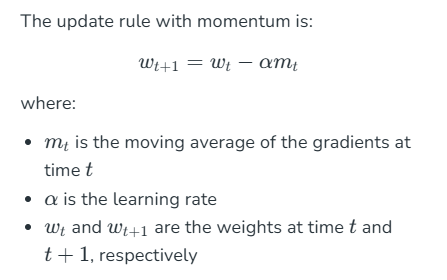


### 2. RMSprop (Root Mean Square Propagation)

RMSprop is an adaptive learning rate method that improves upon AdaGrad. While AdaGrad accumulates squared gradients, RMSprop uses an exponentially weighted moving average of squared gradients, which helps overcome the problem of diminishing learning rates.

The update rule for RMSprop is:

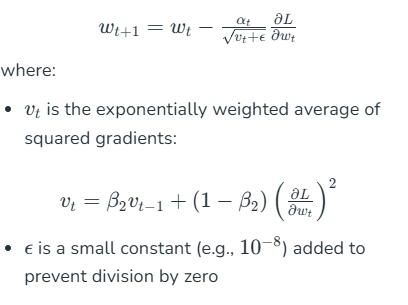


## ✅ Why Adam Works So Well

Adam addresses several challenges of gradient descent optimization:

- **Dynamic learning rates**: Each parameter has its own adaptive learning rate based on past gradients and their magnitudes. This helps the optimizer avoid oscillations and get past local minima more effectively.
- **Bias correction**: By adjusting for the initial bias when the first and second moment estimates are close to zero, Adam helps prevent early-stage instability.
- **Efficient performance**: Adam typically requires fewer hyperparameter tuning adjustments compared to other optimization algorithms like SGD, making it a more convenient choice for most problems.


## 📊 Performance of Adam

In comparison to other optimizers like SGD (Stochastic Gradient Descent) and momentum-based SGD, Adam outperforms them significantly in terms of both training time and convergence accuracy. Its ability to adjust the learning rate per parameter, combined with the bias-correction mechanism, leads to faster convergence and more stable optimization. 

This makes Adam especially useful in complex models with large datasets as it avoids slow convergence and instability while reaching the global minimum.

Estimated weight: 1.942, bias: 1.046
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


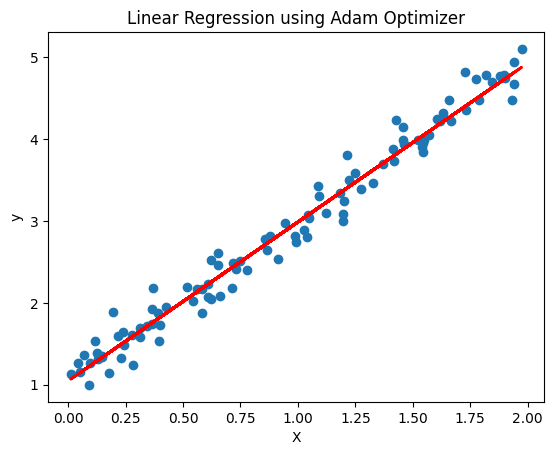

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data: y = 2*x + 1 + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.2

# Define a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse')

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)

# Get the learned weights
w, b = model.layers[0].get_weights()
print(f"Estimated weight: {w[0][0]:.3f}, bias: {b[0]:.3f}")

# Plot the data and the fitted line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title("Linear Regression using Adam Optimizer")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Different Optimizers(SGD Vs Adam)

SGD -> Weight: 1.954, Bias: 1.023
Adam -> Weight: 1.959, Bias: 1.003
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


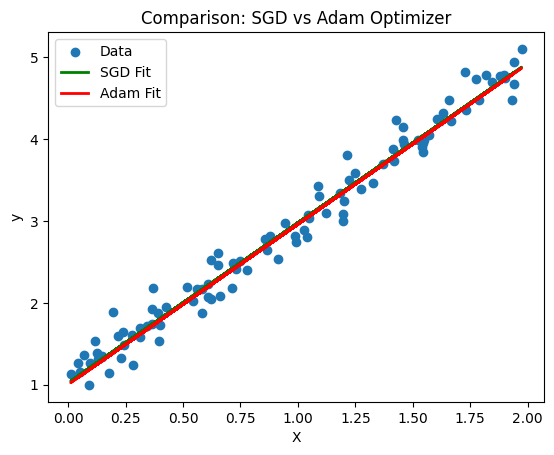

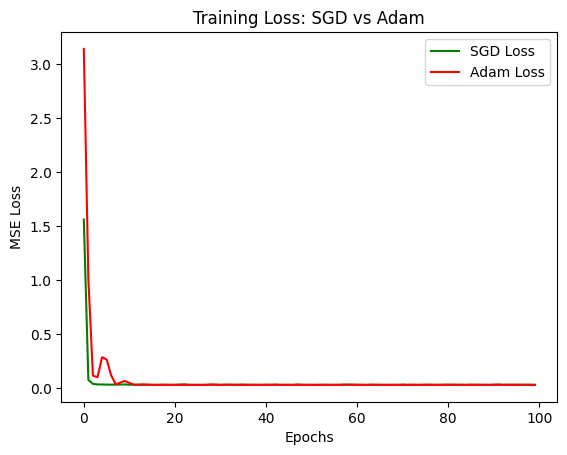

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data: y = 2*x + 1 + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.2

# Function to build and compile a model with a given optimizer
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),  # Input layer
        tf.keras.layers.Dense(1)      # Output layer
    ])
    model.compile(optimizer=optimizer, loss='mse')
    return model

# SGD optimizer
sgd_model = build_model(tf.keras.optimizers.SGD(learning_rate=0.1))
sgd_history = sgd_model.fit(X, y, epochs=100, verbose=0)
w_sgd, b_sgd = sgd_model.layers[0].get_weights()  # <-- Dense layer is now layers[0]
print(f"SGD -> Weight: {w_sgd[0][0]:.3f}, Bias: {b_sgd[0]:.3f}")

# Adam optimizer
adam_model = build_model(tf.keras.optimizers.Adam(learning_rate=0.1))
adam_history = adam_model.fit(X, y, epochs=100, verbose=0)
w_adam, b_adam = adam_model.layers[0].get_weights()  # <-- Dense layer is layers[0]
print(f"Adam -> Weight: {w_adam[0][0]:.3f}, Bias: {b_adam[0]:.3f}")

# Plot predictions
plt.scatter(X, y, label='Data')
plt.plot(X, sgd_model.predict(X), color='green', linewidth=2, label='SGD Fit')
plt.plot(X, adam_model.predict(X), color='red', linewidth=2, label='Adam Fit')
plt.title("Comparison: SGD vs Adam Optimizer")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot training loss curves
plt.plot(sgd_history.histo ry['loss'], color='green', label='SGD Loss')
plt.plot(adam_history.history['loss'], color='red', label='Adam Loss')
plt.title("Training Loss: SGD vs Adam")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# 🔹 Comparing SGD and Adam Optimizers for Linear Regression

This notebook demonstrates how to compare the performance of **SGD** and **Adam** optimizers on a simple linear regression problem using TensorFlow.


## 1️⃣ Libraries Used
- **TensorFlow**: For building and training models.  
- **NumPy**: For numerical computations and data handling.  
- **Matplotlib**: For plotting data points, predictions, and training loss.


## 2️⃣ Synthetic Data
- 100 data points `X` are generated randomly in the range [0, 2].  
- Target values `y` are computed using the linear equation `y = 2*X + 1` with some Gaussian noise.  
- This creates a simple linear regression problem to test different optimizers.


## 3️⃣ Model Architecture
- A **Sequential model** with a single input and a single output neuron.  
- The input layer is defined explicitly using `tf.keras.Input(shape=(1,))`.  
- The output layer is a `Dense` layer with 1 neuron.  
- **Mean Squared Error (MSE)** is used as the loss function.


## 4️⃣ Training with SGD
- The model is trained using **Stochastic Gradient Descent (SGD)**.  
- SGD updates weights with a fixed learning rate and may converge slower compared to adaptive optimizers.  
- After training, the learned **weight** and **bias** are retrieved.  


## 5️⃣ Training with Adam
- The model is trained using the **Adam optimizer**.  
- Adam combines momentum and adaptive learning rates for faster and more stable convergence.  
- Learned **weight** and **bias** are also retrieved after training.  


## 6️⃣ Predictions
- Predictions from both optimizers are plotted against the original data.  
- **Green line**: SGD predictions.  
- **Red line**: Adam predictions.  
- This allows visual comparison of how well each optimizer fits the data.


## 7️⃣ Training Loss vs Epochs
- The **training loss (MSE)** is plotted over epochs for both optimizers.  
- Helps compare:
  - **Convergence speed**  
  - **Stability of training**  
- **Green curve**: SGD loss  
- **Red curve**: Adam loss  


## ✅ Summary
- **SGD**: Simple, fixed learning rate; may oscillate and converge slower.  
- **Adam**: Adaptive learning rate with momentum; usually converges faster and smoother.  
- **Plots**: Show both predicted lines and training loss curves, providing a clear comparison of optimizer performance.  

# 5️⃣ Initialization

# 🔹 Weight Initialization in Neural Networks

Weight initialization is crucial in training deep neural networks. Proper initialization can prevent issues like **vanishing gradients** or **exploding gradients**, which slow down or destabilize training.

---

## 1️⃣ Xavier Initialization (Glorot Initialization)

- Designed for **tanh** or **sigmoid** activation functions.  
- Goal: Keep the **variance of activations** roughly the same across every layer.  

### Formula:
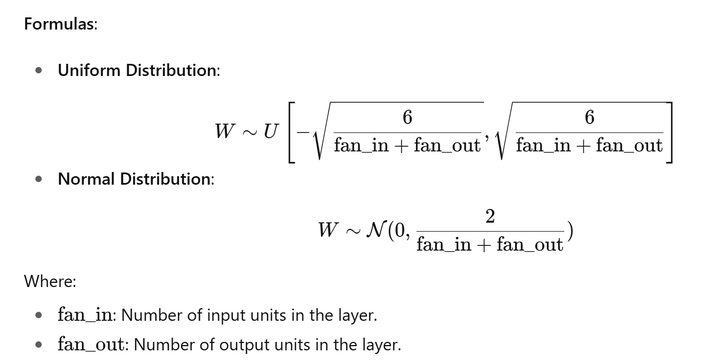

**Effect:** Reduces vanishing/exploding gradients in layers with symmetric activations.


## 2️⃣ He Initialization (Kaiming Initialization)

- Designed for **ReLU** and its variants.  
- Goal: Scale variance appropriately to account for ReLU’s nonlinearity.  

### Formula:

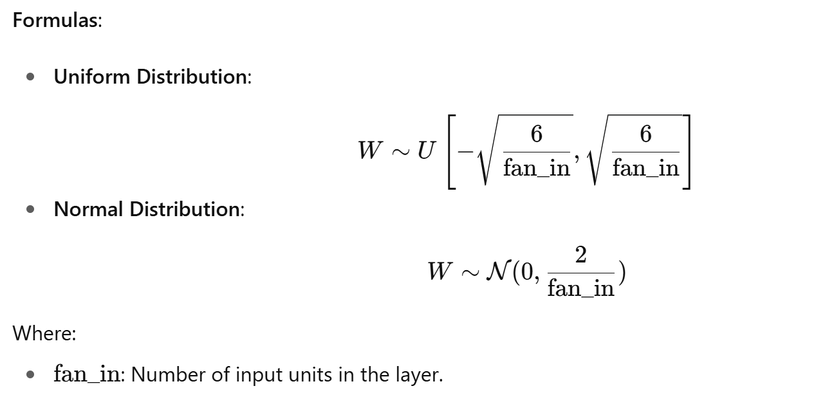

**Effect:** Maintains signal variance across layers and prevents dying ReLU neurons.


## 3️⃣ Summary Table

| Initialization | Best For       | Key Idea                                      |
|----------------|----------------|-----------------------------------------------|
| Xavier (Glorot)| Sigmoid, Tanh  | Keep variance of activations equal across layers |
| He (Kaiming)   | ReLU, Leaky ReLU | Scale variance to account for ReLU nonlinearity |


✅ Proper initialization accelerates training and improves stability in deep neural networks.


# 6️⃣ Batch️ vs Mini-batch vs Online traning

# 🔹 Types of Training in Neural Networks

Training a neural network involves updating weights using gradients computed from the data. Depending on how many examples are used to compute each update, there are three main types of training:


## 1️⃣ Batch Gradient Descent (Full Batch)

- **Definition:**  
  Uses the **entire training dataset** to compute the gradient of the loss function for every weight update.  

- **Characteristics:**  
  - One update per epoch (one pass through all data).  
  - Accurate gradient estimation because it uses all data.  
  - Can be **very slow** and require **large memory** for huge datasets.  

- **Pros:**  
  - Converges smoothly.  
  - Accurate estimate of gradients.  

- **Cons:**  
  - High memory usage for large datasets.  
  - Slow updates.  


## 2️⃣ Mini-Batch Gradient Descent

- **Definition:**  
  Splits the training dataset into **small batches** (e.g., 32, 64, 128 samples).  
  Each batch is used to compute gradients and update weights.  

- **Characteristics:**  
  - Combines advantages of batch and online training.  
  - Commonly used in practice.  
  - Reduces memory requirements and speeds up training.  

- **Pros:**  
  - Faster than full batch.  
  - Can take advantage of vectorized operations.  
  - Introduces small noise in updates → can help escape local minima.  

- **Cons:**  
  - Slightly noisier updates than full batch.  


## 3️⃣ Online (Stochastic) Gradient Descent

- **Definition:**  
  Updates the model weights **after every single training example**.  

- **Characteristics:**  
  - High variance in updates because each update depends on one example.  
  - Often called **Stochastic Gradient Descent (SGD)**.  
  - Can converge faster initially.  

- **Pros:**  
  - Fast updates.  
  - Can work with very large datasets.  
  - Helps escape local minima due to noisy updates.  

- **Cons:**  
  - Convergence can be noisy and less stable.  
  - Learning rate scheduling is often needed.  


## 4️⃣ Summary Table

| Training Type | Update Frequency         | Pros                                   | Cons                                     |
|---------------|-------------------------|----------------------------------------|-----------------------------------------|
| Batch         | After entire dataset    | Smooth convergence, accurate gradients | Slow, high memory usage                 |
| Mini-batch    | After each batch        | Faster, less memory, stable convergence| Slightly noisy updates                  |
| Online/SGD    | After each example      | Fast, works with large datasets        | Noisy, less stable convergence          |

# 7️⃣ Math

# 1. Forward pass equation

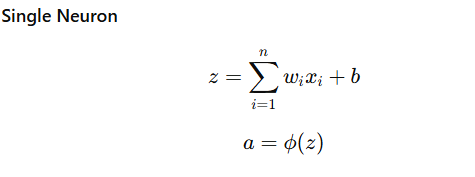

Where:

𝑥𝑖 = input feature 𝑖

𝑤𝑖= weight for input 𝑖

𝑏 = bias term

𝑧= weighted sum of inputs

𝑎= output after activation

𝜙(⋅)= activation function (e.g., Sigmoid, ReLU, Tanh)

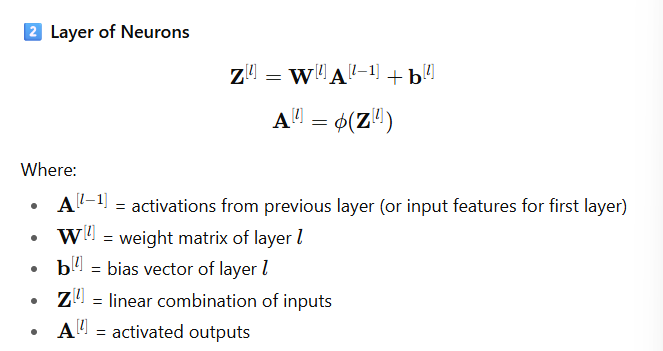

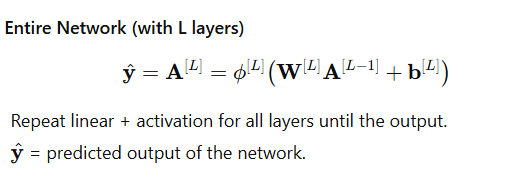
## 🔹 Summary

- The forward pass **calculates the output** of a neural network for given input data.
- Linear combination \(z = Wx + b\) is followed by an **activation function** to capture non-linear patterns.
- This process is repeated for all layers until the **output layer** is reached.

# 2.Backpropagation step-by-step

### 1. Why do we need Backpropagation?
- Neural networks have millions of parameters (weights & biases).  
- To learn, we must adjust parameters so predictions get closer to true outputs.  
- Backprop tells us how much each parameter contributed to the error.  
- Without it, training deep networks would not be practical.

Input Data flow through the network layer by layer

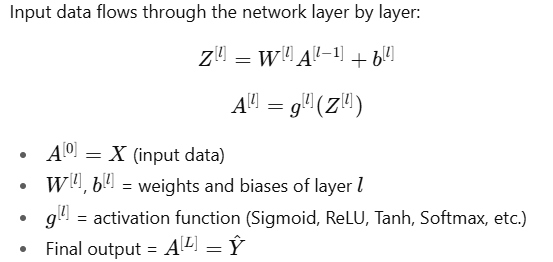


### 2. Forward Pass
- Input flows through the network layer by layer.  
- Each layer: multiply inputs by weights, add biases, apply activation.  
- Final output is produced.  
- Compare output with true label using a loss function (error measure).  

# 2.1 Compute Loss

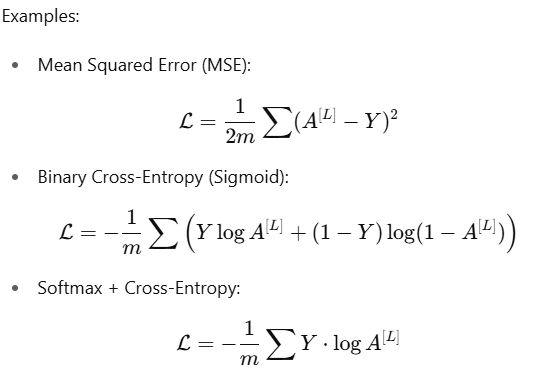

### 3. Backward Pass
- Error moves backward through the network.  
- Start from output layer (prediction vs. actual).  
- Use chain rule to pass error back through layers.  
- At each layer, compute:  
  - How activations contributed to error.  
  - How weights & biases should change.  
- Continue until input layer is reached. 

# 2.2 Backward pass

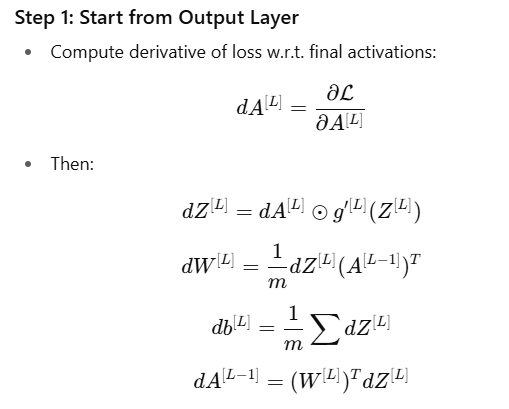
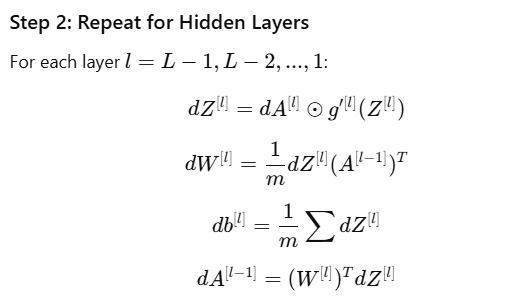

### 4. Parameter Update
- Once gradients are known, update parameters:  
  - Subtract a fraction of gradient (learning rate).  
- Predictions get slightly better next time.  
- Repeat many times → model learns patterns.  


# 2.3.Parameter Update

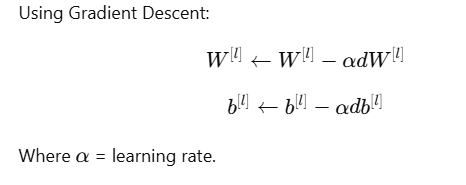

### 5. Activation Functions & Backprop
- Derivatives of activations are needed for error flow.  
- **Sigmoid, Tanh**: control strength of neuron response.  
- **ReLU**: helps reduce vanishing gradient problem.  
- They control how much error passes backward.  

# 2.4 Activation Derivatives

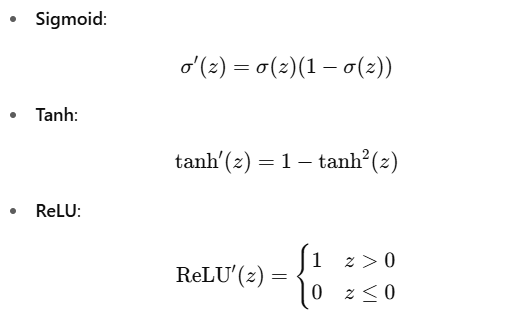

# 3.Cross-entropy loss derivation for Softmax

# 🔹 Cross-Entropy Loss Derivation for Softmax


### 1. Why Softmax?
- In classification, we want the model to output probabilities for each class.  
- The **softmax function** converts raw scores (logits) into probabilities that sum to 1.  
- Each output can then be interpreted as:  
  *"How likely is this input to belong to each class?"*  


### 2. Why Cross-Entropy?
- We need a loss function that measures how close the predicted probability distribution is to the true distribution.  
- The **true distribution** is usually "one-hot" (the correct class = 1, others = 0).  
- **Cross-entropy** measures the distance between the true distribution and predicted distribution.  
- Lower cross-entropy = better match between prediction and truth.  


### 3. Derivation Idea
- Start from **likelihood**: we want to maximize the probability assigned to the correct class.  
- Taking the log gives **log-likelihood** (easier to compute, avoids tiny numbers).  
- Negative log-likelihood (NLL) is used as the loss → smaller = better prediction.  
- For softmax outputs, this NLL simplifies into the **cross-entropy loss**.  


### 4. How It Works
- If the model predicts high probability for the correct class → loss is small.  
- If the model predicts low probability for the correct class → loss is large.  
- Cross-entropy penalizes wrong predictions more strongly.  


### 5. Why It’s Used
- Works perfectly with **softmax** outputs.  
- Encourages the model to assign high probability to the correct class.  
- Differentiable → gradients can flow backward for optimization.  
- Standard choice for multi-class classification tasks.  


### 6. Summary
- Softmax → turns logits into probabilities.  
- Cross-entropy → measures distance between predicted and true distribution.  
- Together, they form the most common setup for classification in deep learning.  

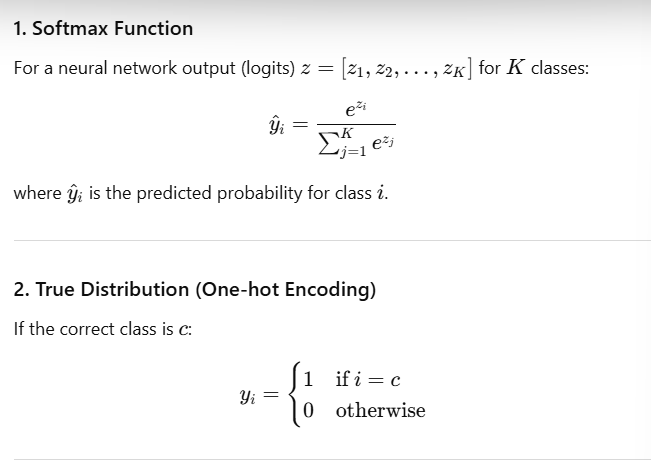
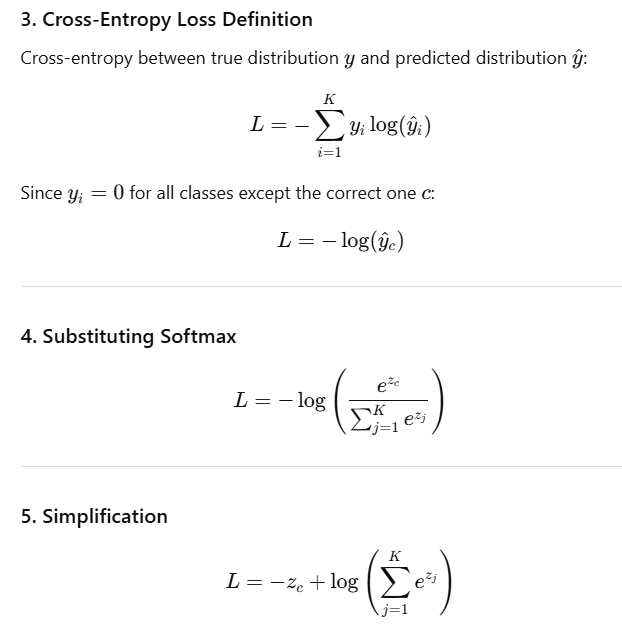

# 🔹 Why ReLU is Preferred (Avoids Vanishing Gradients)

### 1. Why ReLU is Useful
- **Simple & efficient** → only threshold at zero.  
- **No vanishing gradient for positive inputs** → gradient = 1, so error signals can flow easily during backpropagation.  
- **Sparse activation** → many neurons output zero, which helps efficiency and reduces overfitting.  

### 2. Avoids Vanishing Gradient Problem
- Sigmoid/Tanh squish values into small range → derivatives are very small (close to 0).  
- This makes gradients vanish as they move backward through layers.  
- ReLU solves this for positive values because derivative = 1 → keeps gradients strong.  

### 3. Limitation
- For negative inputs, gradient = 0 (dead neurons problem).  
- Variants like **Leaky ReLU** and **ELU** fix this.  

### ✅ Summary
- ReLU is widely used because it:  
  - Keeps gradients alive (avoids vanishing).  
  - Is computationally simple.  
  - Works well for deep networks.  

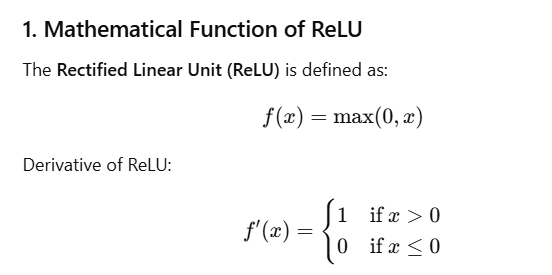

# Optimization update equations (SGD, Momentum, Adam).

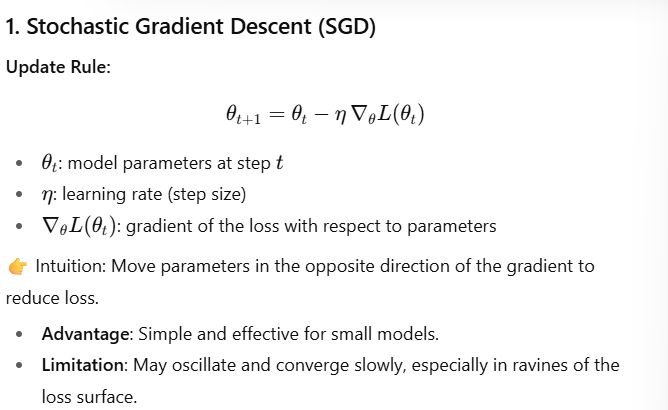


- Updates parameters by moving them in the opposite direction of the gradient.  
- The size of the step is controlled by the learning rate.  
- Simple and widely used, but can be slow and may oscillate in narrow valleys of the loss surface.  

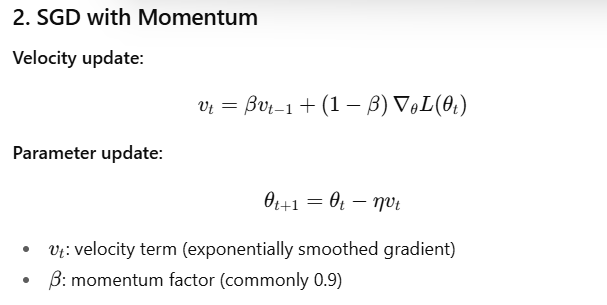

- Adds a "velocity" term that remembers past gradients.  
- Helps accelerate updates in the correct direction.  
- Reduces oscillations and makes convergence faster.  
- Intuition: like a ball rolling downhill with momentum — it keeps moving in the same direction unless opposed. 

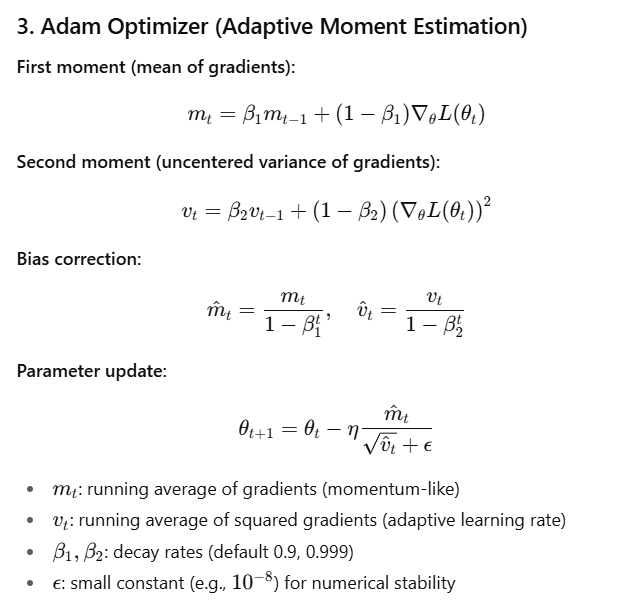

- Combines the ideas of **Momentum** and **adaptive learning rates**.  
- Keeps track of:
  - The average of past gradients (momentum effect).  
  - The average of past squared gradients (adaptive learning rate).  
- Applies bias correction to stabilize early steps.  
- Very popular in deep learning because it works well out of the box for many problems.  


## ✅ Summary
- **SGD** → simple and effective but can be slow.  
- **Momentum** → adds memory, speeds up training, smoother path.  
- **Adam** → adaptive + momentum, default choice in most deep learning frameworks. 